<a href="https://colab.research.google.com/github/rlrocha90/TP555_Trabalho1/blob/main/Trabalho1_Exercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lista #5 - Exercício 14
-> Clasificação Multiclasse

In [74]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("https://raw.githubusercontent.com/rlrocha90/TP555_Trabalho1/main/circles_plus_two_moons.csv?token=GHSAT0AAAAAACEQKZGSCG4HRXPUVKJBA3LWZE5TDRA",
                 delimiter=",", dtype=str)
data = np.array(data.astype(float))
print(data)
X = np.array(data[:,[0, 1]]).astype(float)
y = np.transpose(np.array(data[:,2]).astype(int))

print(X)
print(y)

[[-1.52681098  0.12318902  0.        ]
 [-1.56869306  0.17317222  0.        ]
 [-1.41351031  0.36458046  0.        ]
 ...
 [ 1.49399399 -2.          5.        ]
 [ 1.496997   -2.          5.        ]
 [ 1.5        -2.          5.        ]]
[[-1.52681098  0.12318902]
 [-1.56869306  0.17317222]
 [-1.41351031  0.36458046]
 ...
 [ 1.49399399 -2.        ]
 [ 1.496997   -2.        ]
 [ 1.5        -2.        ]]
[0 0 0 ... 5 5 5]


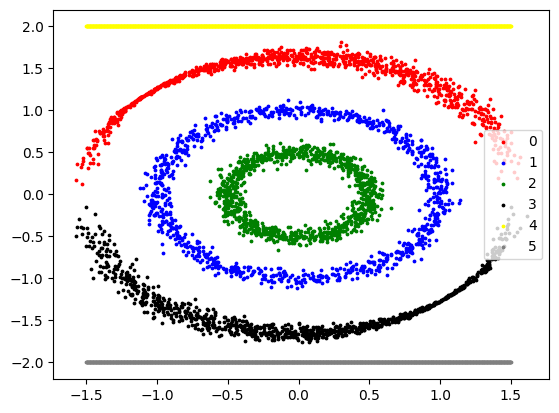

In [75]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], s=3, c='red')
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=3, c='blue')
plt.scatter(X[:,0][y==2], X[:,1][y==2], s=3, c='green')
plt.scatter(X[:,0][y==3], X[:,1][y==3], s=3, c='black')
plt.scatter(X[:,0][y==4], X[:,1][y==4], s=3, c='yellow')
plt.scatter(X[:,0][y==5], X[:,1][y==5], s=3, c='gray')
plt.legend(['0','1','2','3','4','5'])
plt.show()

In [78]:
# Definção do exemplo do Github de TP555

def to_one_hot(y):
    '''Converte para codificação one-hot.'''
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def from_one_hot(y):
    '''Desfaz a codificação one-hot.'''
    y_ = np.zeros((len(y), 1))
    for i in range(len(y)):
        y_[i] = np.argwhere(y[i,:] == 1)
    return y_

class SoftmaxRegressor():
    '''Classe que implementa o Regressor Softmax.'''

    def __init__(self, alpha=0.1, numEpochs=1):
        self.alpha = alpha
        self.numEpochs = numEpochs
        self.A = 0
        self.A_min = 0

    def hypothesis(self, X, use_a_min=False):
        '''Função hipótese.'''
        if(use_a_min == False):
            g = X.dot(self.A)
        else:
            g = X.dot(self.A_min)
        exps = np.exp(g)
        exp_sums = np.sum(exps, axis=1, keepdims=True)
        return exps / exp_sums

    def error_function(self, X, y, eps=1e-7):
        '''Função usada para calcular o erro médio cometido pelo classificador.'''
        h = self.hypothesis(X)
        error = -np.mean(np.sum(y * np.log(h + eps), axis=1))
        return error

    def predict(self, X):
        '''Função que classifica os exemplos de entrada.'''
        h = self.hypothesis(X, use_a_min=True)
        c = np.zeros((len(h), 1))
        for i in range(0, len(h)):
            c[i, 0] = np.argwhere(h[i,:] == h[i,:].max())[0]
        return c

    def predict_prob(self, X):
        '''Função que retorna as probabilidades condicionais.'''
        h = self.hypothesis(X)
        return h

    def fit(self, X_train, y_train, X_test, y_test):
        '''Gradient descent solution.'''

        # Random initialization of parameters.
        self.A = np.random.randn(X_train.shape[1], y_train.shape[1])

        # Create array for storing error values.
        Jgd = np.zeros(self.numEpochs+1)
        Jgd_v = np.zeros(self.numEpochs+1)

        # Calculate initial error.
        Jgd[0] = self.error_function(X_train, y_train)
        Jgd_v[0] = self.error_function(X_test, y_test)

        # Batch gradient-descent loop.
        minimum_val_error = float("inf")
        iteration = 0
        min_iter = 0
        error = 1
        while iteration < self.numEpochs:
            # Update weights.
            gradients = -(1/len(y_train))*X_train.T.dot(y_train - self.hypothesis(X_train))
            self.A = self.A - alpha*gradients

            # Calculating training and validation errors.
            Jgd[iteration+1] = self.error_function(X_train, y_train)
            Jgd_v[iteration+1] = self.error_function(X_test, y_test)

            # Early-stopping: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                self.A_min = self.A
                min_iter = iteration

            # Update iteration number.
            iteration += 1

        return Jgd, Jgd_v, iteration, self.A_min, minimum_val_error, self.A, min_iter

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

In [114]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
alpha = 0.3
numEpochs = 100 #Usando 10000 para determinar a ordem. Será usado 50000 no próximo treinamento com ordem adequada.
Jgd = np.zeros((numEpochs+1, 10))
Jgd_v = np.zeros((numEpochs+1, 10))
scaler = StandardScaler()
for i in range(1,11):
  poly = PolynomialFeatures(degree=i, include_bias=True)
  X_train_t = poly.fit_transform(X_train)
  scaler.fit(X_train_t)
  X_train_t = scaler.fit_transform(X_train_t)
  X_test_t = poly.fit_transform(X_test)
  scaler.fit(X_test_t)
  X_test_t = scaler.fit_transform(X_test_t)
  classifier = SoftmaxRegressor(alpha, numEpochs)

  Jgd[:,i-1], Jgd_v[:,i-1], iteration, A_min, minimum_val_error, A, min_iter = classifier.fit(X_train_t, y_train, X_test_t, y_test)

  print('Poli: ', i, '- Iteration:', iteration)
  print('Poli: ', i, '- Minimum validation error:', minimum_val_error)



Poli:  1 - Iteration: 100
Poli:  1 - Minimum validation error: 1.211714113066538
Poli:  2 - Iteration: 100
Poli:  2 - Minimum validation error: 0.581048593035511
Poli:  3 - Iteration: 100
Poli:  3 - Minimum validation error: 0.5030463968102175
Poli:  4 - Iteration: 100
Poli:  4 - Minimum validation error: 0.37818279719744474
Poli:  5 - Iteration: 100
Poli:  5 - Minimum validation error: 0.33786251623381547
Poli:  6 - Iteration: 100
Poli:  6 - Minimum validation error: 0.3330014840163221
Poli:  7 - Iteration: 100
Poli:  7 - Minimum validation error: 0.34222636522482336
Poli:  8 - Iteration: 100
Poli:  8 - Minimum validation error: 0.26320363417292736
Poli:  9 - Iteration: 100
Poli:  9 - Minimum validation error: 0.3175263936723162
Poli:  10 - Iteration: 100
Poli:  10 - Minimum validation error: 0.24665695802062518


(101, 10)


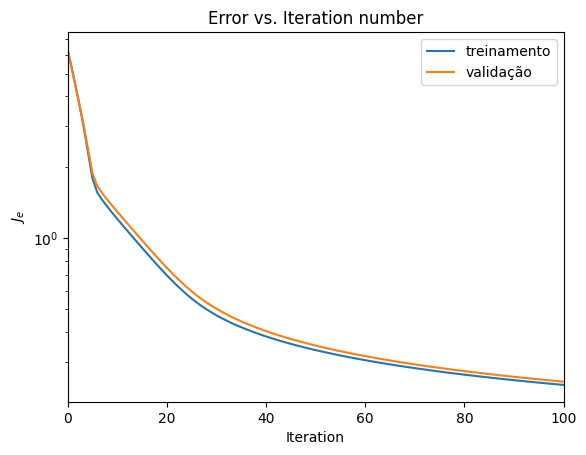

In [115]:
print(Jgd.shape)
i = 10
fig = plt.figure()
plt.plot(np.arange(0, iteration+1), Jgd.T[i-1, 0:iteration+1], label='treinamento')
plt.plot(np.arange(0, iteration+1), Jgd_v.T[i-1, 0:iteration+1], label='validação')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()

In [118]:
alpha = 0.3
numEpochs = 1000
i = 10 #-> Definir o valor do Polinômio
poly = PolynomialFeatures(degree=i, include_bias=True)
X_train_t = poly.fit_transform(X_train)
scaler.fit(X_train_t)
X_train_t = scaler.fit_transform(X_train_t)
X_test_t = poly.fit_transform(X_test)
scaler.fit(X_test_t)
X_test_t = scaler.fit_transform(X_test_t)

classifier = SoftmaxRegressor(alpha, numEpochs)

Jgd, Jgd_v, iteration, A_min, minimum_val_error, A, min_iter = classifier.fit(X_train_t, y_train, X_test_t, y_test)

print('Poli: ', i, '- Iteration:', iteration)
print('Poli: ', i, '- Minimum validation error:', minimum_val_error)

Poli:  10 - Iteration: 1000
Poli:  10 - Minimum validation error: 0.07827582338504481


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_t)

acc = accuracy_score(from_one_hot(y_test), y_pred)
print('Acurácia:',acc)

(1500, 66)
Acurácia: 0.986


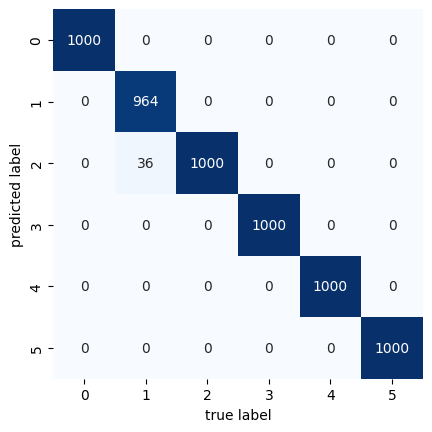

In [129]:
import seaborn as sns
Xa = poly.fit_transform(X)
scaler.fit(Xa)
Xa = scaler.fit_transform(Xa)
y_preda = classifier.predict(Xa)

fig = plt.figure()
mat = confusion_matrix(y, y_preda)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(0,6), yticklabels=range(0,6), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

(52500, 2)
[[-2.07270068 -2.5       ]
 [-2.05270068 -2.5       ]
 [-2.03270068 -2.5       ]
 ...
 [ 2.06729932  2.48      ]
 [ 2.08729932  2.48      ]
 [ 2.10729932  2.48      ]]


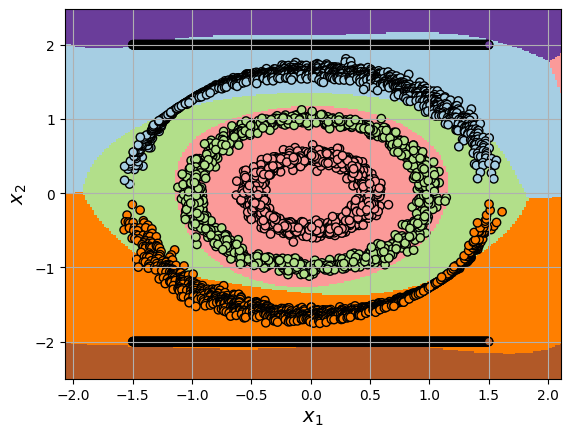

In [135]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape
# as the one created for the training.
attribute_matrix = np.c_[xx.ravel(), yy.ravel()]
attribute_matrixa = poly.fit_transform(attribute_matrix)
scaler.fit(attribute_matrixa)
attribute_matrixa = scaler.fit_transform(attribute_matrixa)

Z = classifier.predict(attribute_matrixa)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()

In [137]:
from sklearn.metrics import classification_report

target = ['0','1','2','3','4','5']

print(classification_report(y, y_preda, target_names=target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      0.96      0.98      1000
           2       0.97      1.00      0.98      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

